# KMeans - Country clusters

In [8]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('Country_clusters.csv')
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

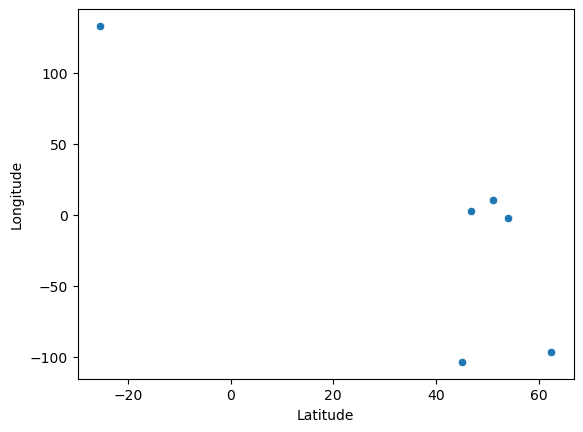

In [10]:
sns.scatterplot(x = df['Latitude'],y = df['Longitude'])

In [11]:
x = df[['Latitude','Longitude']]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


# Model Training

In [14]:
# kmeans_model = KMeans(n_clusters=3)
# kmeans_model.fit(x)
from sklearn.cluster import KMeans
# Set the n_init parameter explicitly
kmeans = KMeans(n_clusters=3, n_init=10)  # You can adjust the number of clusters and n_init as needed

# Fit the KMeans model
kmeans.fit(x)


KMeans(n_clusters=3, n_init=10)

In [18]:
# y_var = kmeans_model.fit_predict(x)
# y_var


# Set the n_init parameter explicitly to suppress the warning
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Adjust the number of clusters and random_state as needed

# Fit the KMeans model
kmeans.fit(x)


KMeans(n_clusters=3, n_init=10, random_state=42)

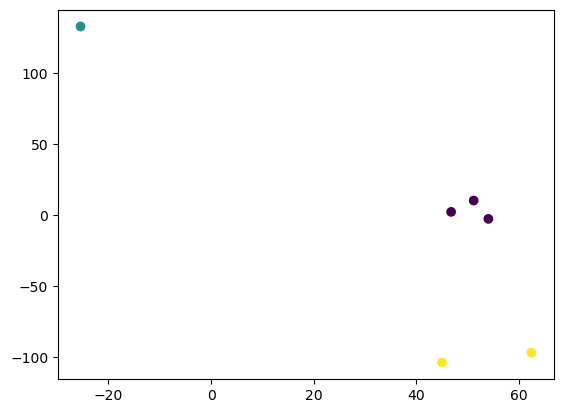

In [19]:
plt.scatter(x['Latitude'],x['Longitude'],c = y_var)

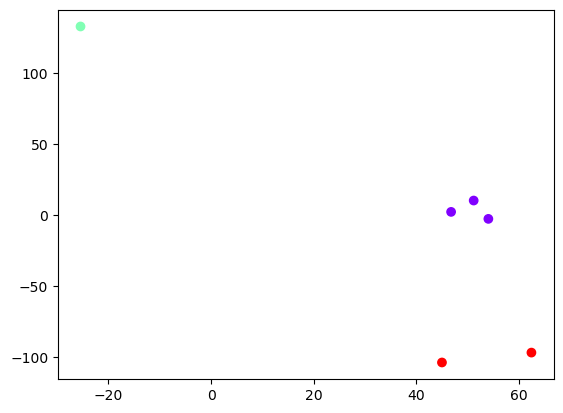

In [20]:
plt.scatter(x['Latitude'],x['Longitude'],c = y_var,cmap = 'rainbow')

In [21]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [23]:
# -25.45	133.11
# 53, 100
# 50, 3.4

In [24]:
kmeans_model.cluster_centers_

array([[  50.63666667,    3.42333333],
       [ -25.45      ,  133.11      ],
       [  53.685     , -100.285     ]])

# WCSS

In [25]:
wcss = kmeans_model.inertia_
wcss

288.10523333333333

In [28]:
# kmeans_model = KMeans(n_clusters=1)
# kmeans_model.fit(x)
# print("Centroids :\n",kmeans_model.cluster_centers_)
# wcss = kmeans_model.inertia_
# wcss
import warnings
warnings.filterwarnings("ignore")

      # Create KMeans instance
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters and random_state as needed

# Fit the KMeans model
kmeans.fit(x)


KMeans(n_clusters=3, random_state=42)

In [29]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(x)
print("Centroids :\n",kmeans_model.cluster_centers_)
wcss = kmeans_model.inertia_
wcss

Centroids :
 [[ 51.856 -38.06 ]
 [-25.45  133.11 ]]


13205.758119999999

In [30]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(x)
print("Centroids :\n",kmeans_model.cluster_centers_)
wcss = kmeans_model.inertia_
wcss

Centroids :
 [[  50.63666667    3.42333333]
 [ -25.45        133.11      ]
 [  53.685      -100.285     ]]


288.10523333333333

In [31]:
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(x)
print("Centroids :\n",kmeans_model.cluster_centers_)
wcss = kmeans_model.inertia_
wcss

Centroids :
 [[  50.63666667    3.42333333]
 [  44.97       -103.77      ]
 [ -25.45        133.11      ]
 [  62.4         -96.8       ]]


111.91233333333332

In [32]:
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(x)
print("Centroids :\n",kmeans_model.cluster_centers_)
wcss = kmeans_model.inertia_
wcss

Centroids :
 [[ 5.0380e+01 -6.5000e-02]
 [-2.5450e+01  1.3311e+02]
 [ 6.2400e+01 -9.6800e+01]
 [ 4.4970e+01 -1.0377e+02]
 [ 5.1150e+01  1.0400e+01]]


38.50624999999998

In [33]:
kmeans_model = KMeans(n_clusters=6)
kmeans_model.fit(x)
print("Centroids :\n",kmeans_model.cluster_centers_)
wcss = kmeans_model.inertia_
wcss

Centroids :
 [[  54.01   -2.53]
 [ -25.45  133.11]
 [  62.4   -96.8 ]
 [  44.97 -103.77]
 [  51.15   10.4 ]
 [  46.75    2.4 ]]


0.0

In [34]:
wcssList = []
for k in range(1,7):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(x)
    wcss = kmeans_model.inertia_
    wcssList.append(wcss)
    print(f"k == {k}, wcss == {wcss}")

k == 1, wcss == 42601.91356666667
k == 2, wcss == 13205.758119999999
k == 3, wcss == 288.10523333333333
k == 4, wcss == 111.91233333333332
k == 5, wcss == 38.50624999999998
k == 6, wcss == 0.0


Text(0, 0.5, 'WCSS')

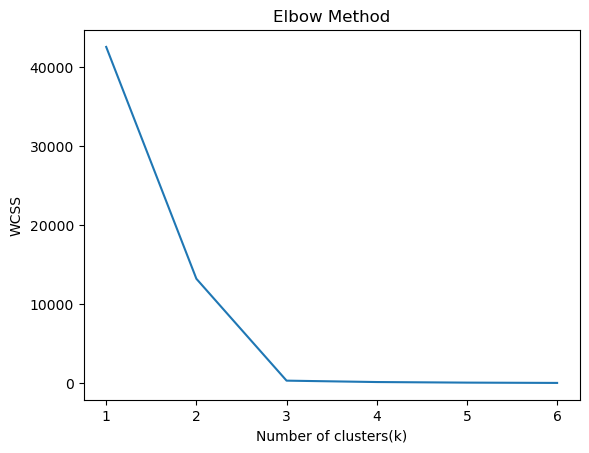

In [35]:
k_val = range(1,7)
plt.plot(k_val,wcssList)
plt.title("Elbow Method")
plt.xlabel("Number of clusters(k)")
plt.ylabel("WCSS")